In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [159]:
print(train_df.shape)
print(train_df.info())
print(train_df.isnull().sum())

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
d

In [160]:
#fill misising embarks with the mode value (ie the most common value)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

#Dropping the Cabin (as it has too many missing values) and ticket column (not very useful)
train_df.drop(columns=['Cabin', 'Ticket'], inplace=True) 

C:\Users\sinha\AppData\Local\Temp\ipykernel_34012\3843593980.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


In [161]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [162]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64


In [163]:
train_df['Age'] = train_df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))
print(train_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [164]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch']+1
train_df['isAlone'] = (train_df['FamilySize'] == 1).astype(int)

In [165]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  FamilySize   891 non-null    int64  
 11  isAlone      891 non-null    int32  
dtypes: float64(2), int32(1), int64(6), object(3)
memory usage: 80.2+ KB
None


In [166]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,isAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1


In [167]:
train_df['Title'] = train_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,isAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr


In [168]:
print(train_df['Title'].value_counts())

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


In [169]:
# Replacing various titles with a common name or group them
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

# Grouping Mlle and Ms with Miss, and Mme with Mrs
train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,isAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr


In [170]:
print(train_df['Title'].value_counts)

<bound method IndexOpsMixin.value_counts of 0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886    Rare
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object>


In [171]:
train_df['Sex'].value_counts

<bound method IndexOpsMixin.value_counts of 0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object>

In [172]:
print(train_df['Sex'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


In [173]:
# 1. Clean the column first
train_df['Sex'] = train_df['Sex'].str.strip().str.lower()

# 2. Then apply the mapping
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

In [174]:
embark_dummies = pd.get_dummies(train_df['Embarked'], prefix = 'Embarked')

#concatante the new column
train_df = pd.concat([train_df, embark_dummies], axis=1)

train_df = train_df.drop('Embarked', axis=1)

In [175]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,FamilySize,isAlone,Title,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2,0,Mr,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,2,0,Mrs,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,1,1,Miss,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2,0,Mrs,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,1,1,Mr,False,False,True


In [176]:
sns.set_style('whitegrid')

## Now we Start with the EDA

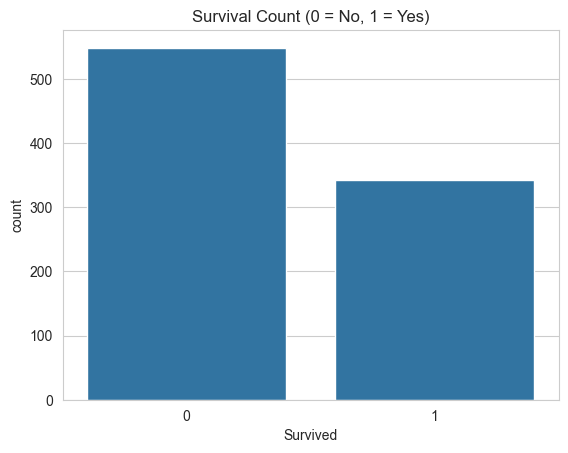

In [177]:
# Univariate Analysis (Analyzing Single Variables)

sns.countplot(x='Survived', data= train_df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

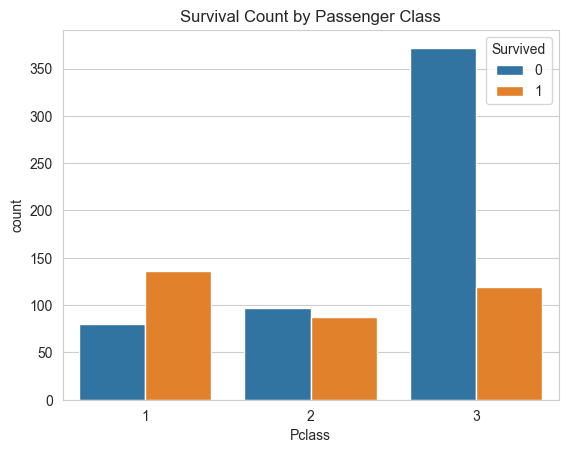

In [178]:
# bivariate Analysis 

sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival Count by Passenger Class')
plt.show()

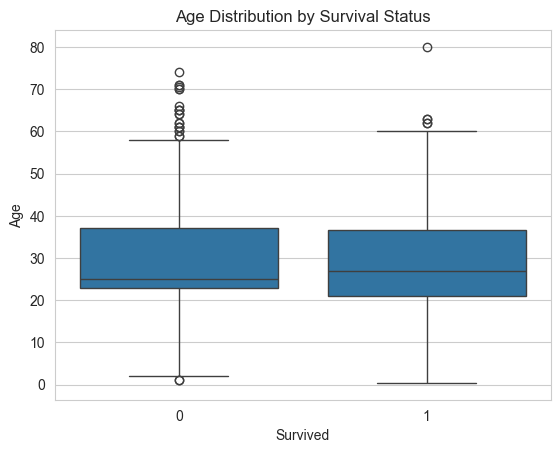

In [179]:
sns.boxplot(x='Survived', y='Age', data=train_df)
plt.title('Age Distribution by Survival Status')
plt.show()

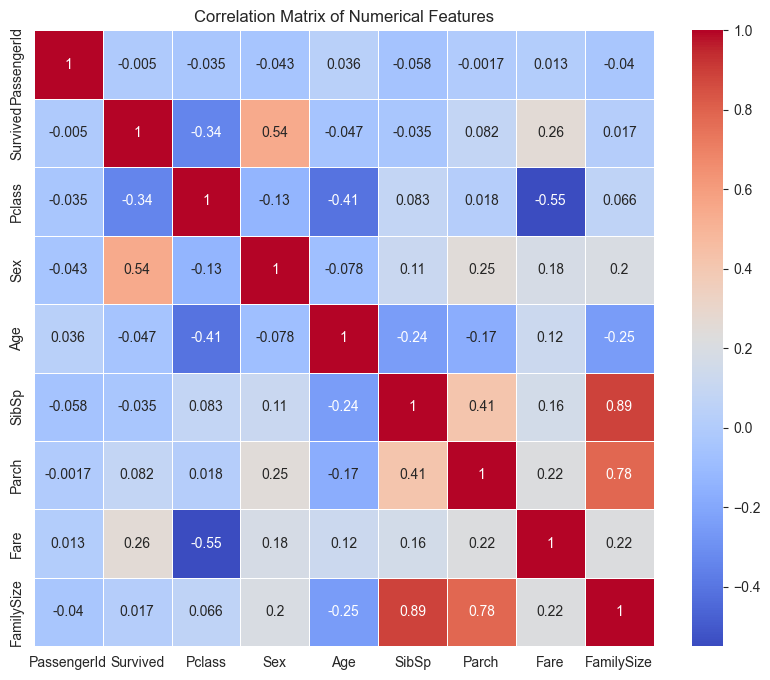

In [180]:
## Multivariate Analysis (Analyzing Multiple Variables) 🧩

# numerical columns for correlation matrix
numerical_df = train_df.select_dtypes(include=['int64', 'float64'])

# Create the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

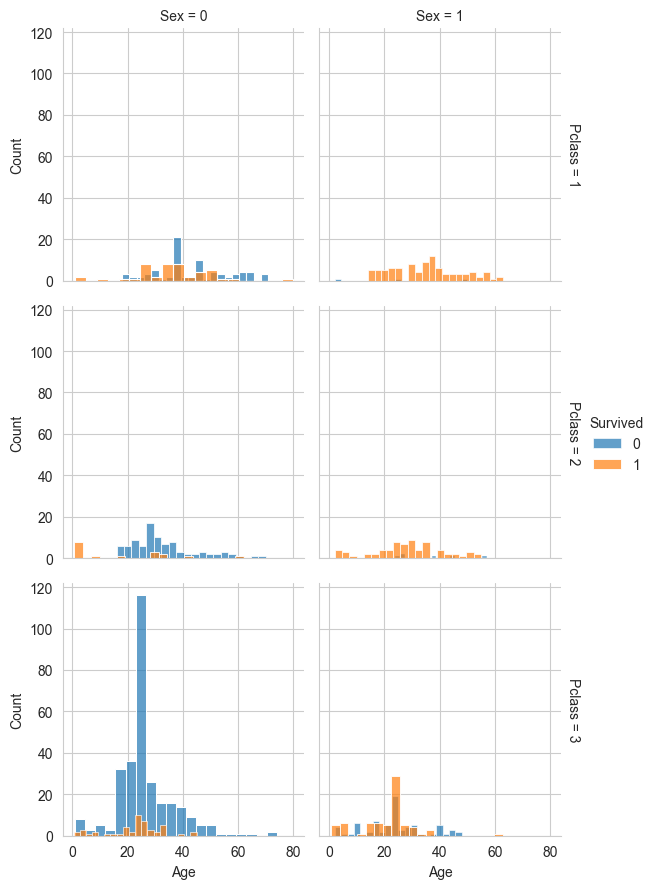

In [181]:
g = sns.FacetGrid(train_df, row='Pclass', col='Sex', hue='Survived', margin_titles=True)

# Map a histogram to the grid
g.map(sns.histplot, 'Age', bins=20, alpha=0.7)

# Add a legend
g.add_legend()

plt.show()

In [182]:
# It's a good idea to save the PassengerId from the test set for the submission file
test_passenger_ids = test_df['PassengerId']

# Dropping columns that are no longer needed from both your training and test data
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']

# Use errors='ignore' in case a column was already dropped
train_df.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')
test_df.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')

print("Final features being used:")
print(train_df.columns)

Final features being used:
Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'isAlone',
       'Title', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [ ]:
# 1. Re-create the categorical 'AgeGroup' column if you already mapped it
bins = [0, 12, 19, 60, 150]
labels = ['Child', 'Teen', 'Adult', 'Senior']
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=bins, labels=labels, right=False)

# 2. Apply one-hot encoding
age_dummies = pd.get_dummies(train_df['AgeGroup'], prefix='Age')

# 3. Concatenate with the main DataFrame
train_df = pd.concat([train_df, age_dummies], axis=1)

# 4. Drop the original 'AgeGroup' and 'Age' columns
train_df.drop(['AgeGroup', 'Age'], axis=1, inplace=True)

print("DataFrame after binning Age:")
print(train_df.head())

DataFrame after binning Age:
   Survived  Pclass  Sex     Fare  FamilySize  isAlone Title  Embarked_C  \
0         0       3    0   7.2500           2        0    Mr       False   
1         1       1    1  71.2833           2        0   Mrs        True   
2         1       3    1   7.9250           1        1  Miss       False   
3         1       1    1  53.1000           2        0   Mrs       False   
4         0       3    0   8.0500           1        1    Mr       False   

   Embarked_Q  Embarked_S  Age_Child  Age_Teen  Age_Adult  Age_Senior  
0       False        True      False     False       True       False  
1       False       False      False     False       True       False  
2       False        True      False     False       True       False  
3       False        True      False     False       True       False  
4       False        True      False     False       True       False  


In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. Create an instance of the StandardScaler
scaler = StandardScaler()

# 2. Fit and transform the 'Fare' column in the training data (train_df)
train_df['Fare'] = scaler.fit_transform(train_df[['Fare']])

# 3. Transform the 'Fare' column in the test data (test_df) using the SAME scaler
# Note: We only use .transform() here, not .fit_transform()
test_df['Fare'] = scaler.transform(test_df[['Fare']])

print("DataFrame after scaling the 'Fare' column:")
print(train_df.head())

DataFrame after scaling the 'Fare' column:
   Survived  Pclass  Sex      Fare  FamilySize  isAlone Title  Embarked_C  \
0         0       3    0 -0.502445           2        0    Mr       False   
1         1       1    1  0.786845           2        0   Mrs        True   
2         1       3    1 -0.488854           1        1  Miss       False   
3         1       1    1  0.420730           2        0   Mrs       False   
4         0       3    0 -0.486337           1        1    Mr       False   

   Embarked_Q  Embarked_S  Age_Child  Age_Teen  Age_Adult  Age_Senior  
0       False        True      False     False       True       False  
1       False       False      False     False       True       False  
2       False        True      False     False       True       False  
3       False        True      False     False       True       False  
4       False        True      False     False       True       False  


In [ ]:
from sklearn.model_selection import train_test_split

X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# 2. Split the data into training and validation sets
# X_train, y_train will be for training the model
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of all data from train.csv:", X.shape)
print("Shape of our new training set:", X_train.shape)
print("Shape of our new validation set:", X_val.shape)

Shape of all data from train.csv: (891, 13)
Shape of our new training set: (712, 13)
Shape of our new validation set: (179, 13)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
print(train_df['Title'].value_counts())

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64


In [ ]:
train_df.head()

,Survived,Pclass,Sex,Fare,FamilySize,isAlone,Title,Embarked_C,Embarked_Q,Embarked_S,Age_Child,Age_Teen,Age_Adult,Age_Senior
0,0,3,0,-0.502445,2,0,Mr,False,False,True,False,False,True,False
1,1,1,1,0.786845,2,0,Mrs,True,False,False,False,False,True,False
2,1,3,1,-0.488854,1,1,Miss,False,False,True,False,False,True,False
3,1,1,1,0.420730,2,0,Mrs,False,False,True,False,False,True,False
4,0,3,0,-0.486337,1,1,Mr,False,False,True,False,False,True,False


In [189]:
# Convert the 'Title' column into numerical format using one-hot encoding
title_dummies = pd.get_dummies(train_df['Title'], prefix='Title')

# Add the new columns to the original DataFrame
train_df = pd.concat([train_df, title_dummies], axis=1)

# Drop the original 'Title' column as it's no longer needed
train_df.drop('Title', axis=1, inplace=True)

print("DataFrame after encoding titles:")
print(train_df.head())

DataFrame after encoding titles:
   Survived  Pclass  Sex      Fare  FamilySize  isAlone  Embarked_C  \
0         0       3    0 -0.502445           2        0       False   
1         1       1    1  0.786845           2        0        True   
2         1       3    1 -0.488854           1        1       False   
3         1       1    1  0.420730           2        0       False   
4         0       3    0 -0.486337           1        1       False   

   Embarked_Q  Embarked_S  Age_Child  Age_Teen  Age_Adult  Age_Senior  \
0       False        True      False     False       True       False   
1       False       False      False     False       True       False   
2       False        True      False     False       True       False   
3       False        True      False     False       True       False   
4       False        True      False     False       True       False   

   Title_Master  Title_Miss  Title_Mr  Title_Mrs  Title_Rare  
0         False       False      True 

In [190]:
# Convert boolean columns to integer (True/False to 1/0)
bool_columns = ['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Age_Child', 'Age_Teen', 'Age_Adult', 'Age_Senior', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']

for col in bool_columns:
  train_df[col] = train_df[col].astype(int)

print("DataFrame after converting boolean columns to integers:")
print(train_df.head())
print("\nData types after conversion:")
print(train_df.dtypes)

DataFrame after converting boolean columns to integers:
   Survived  Pclass  Sex      Fare  FamilySize  isAlone  Embarked_C  \
0         0       3    0 -0.502445           2        0           0   
1         1       1    1  0.786845           2        0           1   
2         1       3    1 -0.488854           1        1           0   
3         1       1    1  0.420730           2        0           0   
4         0       3    0 -0.486337           1        1           0   

   Embarked_Q  Embarked_S  Age_Child  Age_Teen  Age_Adult  Age_Senior  \
0           0           1          0         0          1           0   
1           0           0          0         0          1           0   
2           0           1          0         0          1           0   
3           0           1          0         0          1           0   
4           0           1          0         0          1           0   

   Title_Master  Title_Miss  Title_Mr  Title_Mrs  Title_Rare  
0             0

In [192]:
# Recreate X and y with the properly encoded data
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# Split the data again with the same random state to ensure consistency
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Retrain the model with the corrected data
model.fit(X_train, y_train)

print("Model successfully retrained with encoded features")
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

Model successfully retrained with encoded features
Training set shape: (712, 17)
Validation set shape: (179, 17)


In [193]:
# Train the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [194]:
predictions = model.predict(X_val)

In [195]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Check the accuracy
accuracy = accuracy_score(y_val, predictions)
print(f"Accuracy: {accuracy:.4f}")

# 2. View the Confusion Matrix
# Shows True Positives, False Positives, etc.
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, predictions))

# 3. View the Classification Report
# Gives a detailed report of precision, recall, and f1-score
print("\nClassification Report:")
print(classification_report(y_val, predictions))

Accuracy: 0.8324

Confusion Matrix:
[[89 16]
 [14 60]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       105
           1       0.79      0.81      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179

